<a href="https://colab.research.google.com/github/misterpeddy/hal/blob/master/hal_getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ensure machine has access to a GPU
!nvidia-smi

# Install dependency packages not distributed by pypi; download hal source tree
! pip install torch==1.9.1+cu111 torchvision==0.10.1+cu111 torchaudio==0.9.1 -f https://download.pytorch.org/whl/torch_stable.html
! git clone --recursive https://github.com/misterpeddy/hal.git hal_project

In [ ]:
# Run this cell after every runtime restart
# Install hal and dependencies
%cd hal_project
! pip install -e .

# Set up autoreload
%load_ext autoreload
%autoreload 2

2021-10-28 17:14:43,210	INFO services.py:1092 -- View the Ray dashboard at http://127.0.0.1:8265


Notice the example generation is async. The interpreter is only blocked  when the user calls `hal.show` which waits on its arguments' resolution.


  0%|          | 0/2 [00:00<?, ?it/s]
(pid=3987) /home/peddy_google_com/.pyenv/versions/3.7.0/lib/python3.7/site-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
(pid=3987)   warnings.warn(warning)
100%|██████████| 2/2 [00:01<00:00,  1.94it/s]


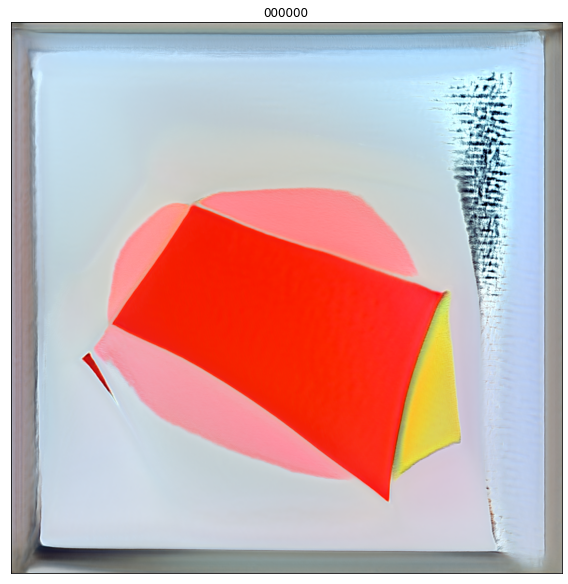

In [2]:
# Initialized hal runtime
import hal
hal.init()

# Load a pretrained model and generate a couple examples 
from hal.models import StyleGan
model = StyleGan()
example = model.example(2)

print("Notice the example generation is async. The interpreter is only blocked \
 when the user calls `hal.show` which waits on its arguments' resolution.")

# Show the generated example
hal.show(example)

/home/peddy_google_com/.pyenv/versions/3.7.0/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/peddy_google_com/.pyenv/versions/3.7.0/lib/python3.7/site-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


10s


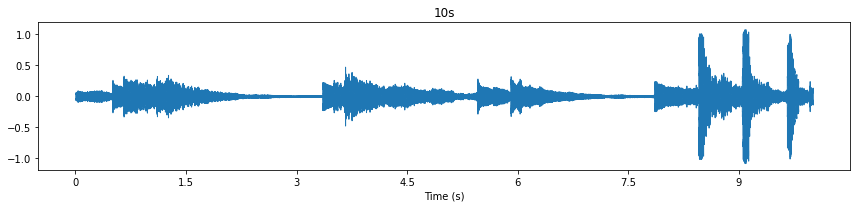

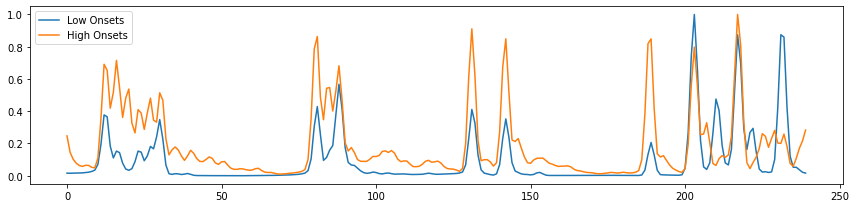

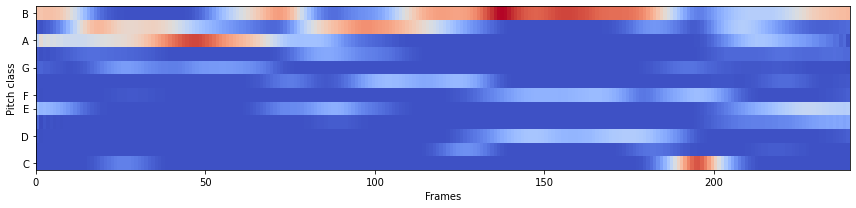

In [5]:
# Load a song as an audio file
from hal.audio import Audio
song = Audio('data/10s.mp3', autogen_stems=False)
hal.show(song)

In [4]:
# Render a scene using the visuals of the model and audio features of the song
from hal.gen import Scene
scene = Scene(model, song.tracks['source'])
render = scene.render()
hal.show(render)

100%|█████████████████████████████████████████| 240/240 [00:08<00:00, 28.50it/s]
